In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Global minimum found considering the initial guess (x,y) = [0, -1] is: 
 ( 0.08984200851935246 , -0.7126564072503617 )
Global minimum found considering the initial guess (x,y) = [0, 1] is: 
 ( -0.08984201547245348 , 0.7126563981544852 )


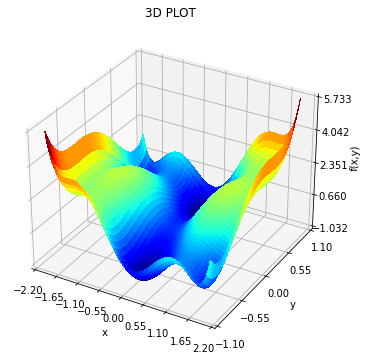

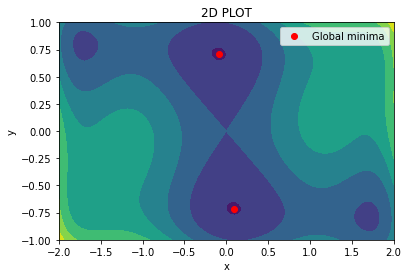

In [2]:
#exercise n.1

def f(x):
    return (4-2.1*pow(x[0],2)+pow(x[0],4)/3)*pow(x[0],2)+x[0]*x[1]+(4*pow(x[1],2)-4)*pow(x[1],2)

x=np.linspace(-2, 2, 10000)
y=np.linspace(-1, 1, 10000)
X, Y=np.meshgrid(x,y)
Z=f([X, Y])

fig=plt.figure(figsize=(9, 6))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
ax.xaxis.set_major_locator(LinearLocator(9))
ax.yaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_locator(LinearLocator(5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D PLOT')

fig1=plt.figure(figsize=(6, 4))
ax1=fig1.add_subplot()
ax1.contourf(x,y,Z)
#fig1.colorbar()
ax1.set_title('2D PLOT')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


#from the 2d plot one can guess that there are 2 global minima. The result provided by the algorithm will depend
#on the initial guess for the minimum position therefore 2 opposite guesses are considered.
#x0->initial guess
x0=[0,-1]
res1=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) =', x0, 'is: \n (',res1.x[0],',', res1.x[1],')')


x0=[0,1]
res2=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) =', x0, 'is: \n (',res2.x[0],',', res2.x[1],')')


if f([res1.x[0],res1.x[1]])==f([res2.x[0],res2.x[1]]): #prints only if the 2 values correspond
    print('Tha value that the function assumes at those points is: ', f([res1.x[0],res1.x[1]]))
    
ax1.plot(res1.x[0], res1.x[1],'o',label='Global minima', color='red')
ax1.plot(res2.x[0], res2.x[1],'o',label='_nolegend_', color='red')
ax1.legend();

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Both the fit appear to be unsatisfactory evaluating the chi^2 test (p-value < 5%).


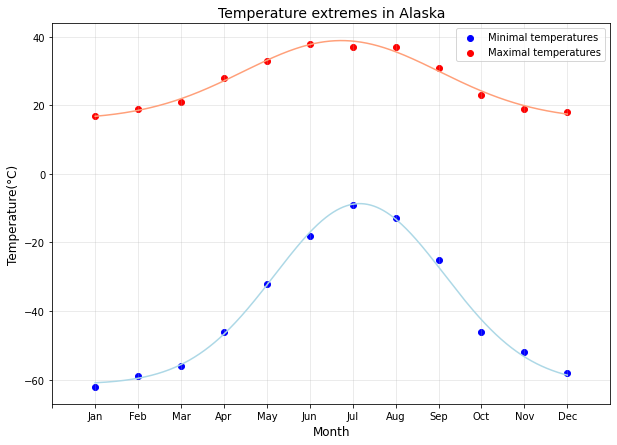

In [24]:
#exercise n.2

import scipy.stats 

list_max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
list_min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
min_t=np.asarray(list_min)
max_t=np.asarray(list_max)
months=np.arange(1, 13)

names=['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
xi = list(range(len(names)))

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(months, min_t, color='blue', label='Minimal temperatures')
ax.scatter(months, max_t, color='red', label='Maximal temperatures')
ax.set_xlim(0, 13)
ax.xaxis.set_major_locator(LinearLocator(14))
plt.xticks(xi, names)
ax.set_title('Temperature extremes in Alaska',  fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Temperature(°C)', fontsize=12)
ax.grid(alpha=0.3)
ax.legend();

#Gaussian fit to describe the data
def gaussian(x, a, x0, sigma, y0):
    return y0+a*np.exp(-pow(x-x0,2)/(2*pow(sigma,2)))

#MAXIMAL TEMPERATURES FIT
#computing reasonable initial parameters for mean and sigma
mean_max=sum(months*max_t)/sum(max_t)
sigma_max=np.sqrt(sum(max_t*(months-mean_max)**2)/sum(max_t))

opt1,cov1=optimize.curve_fit(gaussian, months, max_t, p0=[max(max_t), mean_max, sigma_max, 20])
x_new=np.linspace(1, 12, 5000)
ax.plot(x_new, gaussian(x_new, *opt1), label='Fit maximal temperatures', color='lightsalmon')


#MINIMUM TEMPERATURES FIT
#computing reasonable initial parameters for mean and sigma
mean_min=sum(months*min_t)/sum(min_t)
sigma_min=np.sqrt(sum(min_t*(months-mean_max)**2)/sum(min_t))

opt2,cov2=optimize.curve_fit(gaussian, months, min_t, p0=[max(min_t), mean_min, sigma_min, -60])
ax.plot(x_new, gaussian(x_new, *opt2), label='Fit maximal temperatures', color='lightblue')


#EVALUATING FIT GOODNESS THROUGH chi^2 TEST

#assuming a statistical uncertainty of 1°C/sqrt(3) exploiting a uniform distribution (1°->)
error=np.full((1, len(months)), 1/np.sqrt(3))

#Maximal T fit
ndof=len(months)-4 #4->number of fit parameters
chi2_1=np.sum(((max_t-gaussian(months, *opt2))**2) / error**2)
pvalue1 = 1.-scipy.stats.chi2.cdf(chi2_1, ndof)

#Minimal T fit
chi2_2=np.sum(((min_t-gaussian(months, *opt1))**2) / error**2)
pvalue2 = 1.-scipy.stats.chi2.cdf(chi2_2, ndof)

if pvalue1<0.05 and pvalue2<0.05:
    print('Both the fit appear to be unsatisfactory evaluating the chi^2 test (p-value < 5%).')
elif pvalue1>0.05 and pvalue2<0.05:
    print('Evaluating the chi^2 test, only the fit associated to maximal temperatures is satisfactory.')
elif pvalue1<0.05 and pvalue2>0.05:
    print('Evaluating the chi^2 test, only the fit associated to minimal temperatures is satisfactory.')
else:
    print('Evaluating the chi^2 test, both the fit applied are satisfactory')
    


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

The fit applied is unsatisfactory (p-value < 5%).
Chi^2 reduced is: 28.91 (>>1).
Restricting the fit range around the central peak ([-0.60 , 0.60]), the reduced chi^2 obtained becomes: 6.04 (>1).
The p-value keeps being completely unsatisfactory: p-value = 0.000002


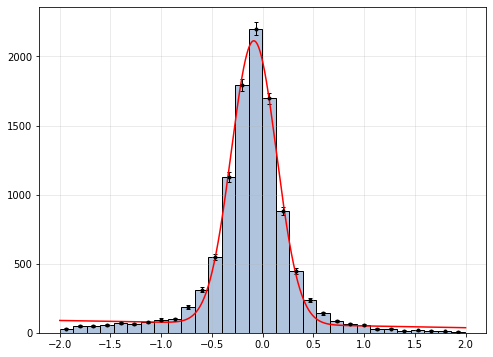

In [31]:
#exercise n.3

#opening pickle file and creating a DataFrame
import pickle
infile=open('data/residuals_261.pkl', 'rb')
new_dict=pickle.load(infile)
infile.close()

dictionary=dict(new_dict.item())
df=pd.DataFrame(dictionary)

df=df[abs(df['residuals'])<2.]#only |residuals|<2 considered
histo=df.loc[:,'residuals']

fig=plt.figure(figsize=(8,6))
ax0=plt.subplot()
ax0.grid(alpha=0.3)
h, bins, _=ax0.hist(histo, bins=30, color='lightsteelblue', edgecolor='black', density=False, cumulative=False)

bincenters=(bins[1:]+bins[:-1])/2
sigma=np.sqrt(h)
ax0.errorbar(bincenters, h, yerr=sigma, fmt='.k', elinewidth=1 ,capsize=2)


#FIT
def f(x, a, sigma, x0, m, q):  #considering gaussian + line to fit 
    return m*x+q+a*np.exp(-pow(x-x0,2)/(2*pow(sigma,2)))

opt,cov=optimize.curve_fit(f, bincenters, h, p0=[max(h), 0.2, 0, 0, 10])
x_new=np.linspace(-2., 2., 5000)
ax0.plot(x_new, f(x_new, *opt), label='Fit', color='red')

ndof=len(bincenters)-5 #5->number of fit parameters
chi2=np.sum(((h-f(bincenters, *opt))**2) / sigma**2)
pvalue = 1.-scipy.stats.chi2.cdf(chi2, ndof)
if pvalue>=0.5:
    print('The fit applied is satisfactory (p-value=', pvalue, ')')
else:
    print('The fit applied is unsatisfactory (p-value < 5%).')
print('Chi^2 reduced is: %1.2f (>>1).' %( chi2/ndof) )
    
#The goodness-of-fit test applied reveals that the gaussian+line fit doesn't describe sufficientely the data. 
#The fit performed evaluted all the points in range [-2,+2]: when the range around the central peak is restricted one
#can verify that the fit improves. Let's briefly prove it.

bincenters1=bincenters.copy()
bincenters1=np.delete(bincenters1, np.s_[:10:], 0)
bincenters1=np.delete(bincenters1, np.s_[11::], 0)

h1=h.copy()
h1=np.delete(h1, np.s_[:10:], 0)
h1=np.delete(h1, np.s_[11::], 0)
sigma1=np.sqrt(h1)

opt1,cov1=optimize.curve_fit(f, bincenters1, h1, p0=[max(h), 0.2, 0, 0, 10])

ndof_1=len(bincenters1)-5
chi2_1=np.sum(((h1-f(bincenters1, *opt1))**2) / sigma1**2)
pvalue_1=1.-scipy.stats.chi2.cdf(chi2_1, ndof_1)
print('Restricting the fit range around the central peak ([%1.2f , %1.2f]), the reduced chi^2 obtained becomes: %1.2f (>1).' %(bincenters1[0], bincenters1[9], chi2_1/ndof_1))
print('The p-value keeps being completely unsatisfactory: p-value = %1.6f.' % (pvalue_1))

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

Evaluating f(t), the fit parameters obtained are (range=[2008-2012]):
a = -9.96 ± 0.13 °C
b = 12.33 ± 0.01 years
c = 9.26 ± 0.09 °C
Overall average temperature in Munich (range=[2008-2012]) is: 9.26 °C.
Typical daily average values predicted by the model for coldest and hottest time of the year are respectively 
 -0.70 °C and  19.22 °C.

Evaluating g(t), the fit parameters obtained are (range=[2008-2012]):
a = -9.96 ± 0.13 °C
b = 1.00 ± 0.00 1/years
c = 8.62 ± 23.79 
d = 9.27 ± 23.79 °C

RSS for f(t) and g(t) are: RSS(f)=18669.52, RSS(g)=18669.23
Fisher F-test:
CL: 0.881 , additional parameter necessary: NO


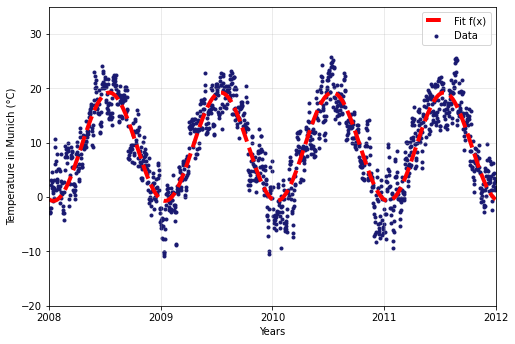

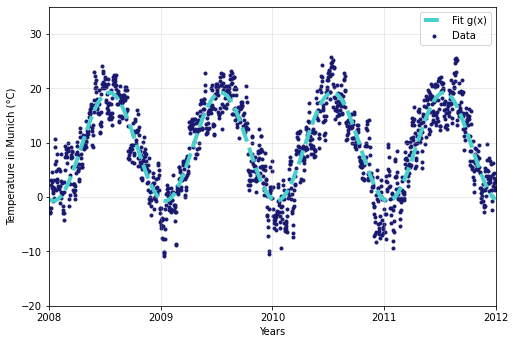

In [77]:
#exercise n.4

from scipy.stats import f as fish

def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*t*b+c)+d

data=np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
year, temperature = data.T

#removing outliers, i.e. 100°C and -100°C rows
mask_up=(temperature<99)
temperature, year=temperature[mask_up], year[mask_up]
mask_down=(temperature>-99)
temperature, year=temperature[mask_down], year[mask_down]

#Only considering range [2008-2012]
mask_2008=(year>=2008)
temperature, year=temperature[mask_2008], year[mask_2008]
mask_2012=(year<=2012)
temperature, year=temperature[mask_2012], year[mask_2012]


fig, ax=plt.subplots(figsize=(8, 5.5))
ax.scatter(year, temperature, label='Data', color='midnightblue', marker='.')
ax.xaxis.set_major_locator(LinearLocator(5)) #printing only integer years
ax.set_xlabel('Years')
ax.set_ylabel('Temperature in Munich (°C)')
ax.set_xlim(2008,2012)
ax.set_ylim(-20,+35)
ax.grid(alpha=0.3)

#FIT F(X)
opt,cov=optimize.curve_fit(f, year, temperature)
x_new=np.linspace(2008, 2012, 5000)
ax.plot(x_new, f(x_new, *opt), label='Fit f(x)', color='red', linewidth=4, linestyle='dashed')
ax.legend(loc='best')

print('Evaluating f(t), the fit parameters obtained are (range=[2008-2012]):')
print('a = %1.2f ± %1.2f °C' %(opt[0], np.sqrt(np.diag(cov))[0]))
print('b = %1.2f ± %1.2f years' %(opt[1], np.sqrt(np.diag(cov))[1]))
print('c = %1.2f ± %1.2f °C' %(opt[2], np.sqrt(np.diag(cov))[2]))

mean_temperature=np.mean(temperature)
print('Overall average temperature in Munich (range=[2008-2012]) is: %1.2f °C.' %(mean_temperature))

print('Typical daily average values predicted by the model for coldest and hottest time of the year are respectively \n %1.2f °C and  %1.2f °C.' %(f(x_new, *opt).min(), f(x_new, *opt).max()))

#Parameter b represents a possibile shift in time for the hottest/coldest days: cosine function would predict
#the hottest days on January (x=0) and the coldest days on June (sim Δx= π/2) and the fit tells me that these 
#expectations are correct (shift is b~12 months, i.e. the function is periodic with a 1 year period)


#FIT G(X)
fig1, ax1=plt.subplots(figsize=(8, 5.5))
ax1.scatter(year, temperature, label='Data', color='midnightblue', marker='.')
ax1.xaxis.set_major_locator(LinearLocator(5)) #printing only integer years
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature in Munich (°C)')
ax1.set_xlim(2008,2012)
ax1.set_ylim(-20,+35)
ax1.grid(alpha=0.3)

opt_g,cov_g=optimize.curve_fit(g, year, temperature)
ax1.plot(x_new, g(x_new, *opt_g), label='Fit g(x)', color='mediumturquoise', linewidth=4, linestyle='dashed')
ax1.legend(loc='best')
print('\nEvaluating g(t), the fit parameters obtained are (range=[2008-2012]):')
print('a = %1.2f ± %1.2f °C' %(opt_g[0], np.sqrt(np.diag(cov_g))[0]))
print('b = %1.2f ± %1.2f 1/years' %(opt_g[1], np.sqrt(np.diag(cov_g))[1]))
print('c = %1.2f ± %1.2f ' %(opt_g[2], np.sqrt(np.diag(cov_g))[2]))
print('d = %1.2f ± %1.2f °C\n' %(opt_g[3], np.sqrt(np.diag(cov_g))[2]))

rss_f=np.sum((f(year,*opt)-temperature)**2)
rss_g=np.sum((g(year,*opt_g)-temperature)**2)
print('RSS for f(t) and g(t) are: RSS(f)=%1.2f, RSS(g)=%1.2f.' %(rss_f, rss_g))

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F=((ssr_1-ssr_2)/(ndof_2-ndof_1))/(ssr_2/(nbins-ndof_2))
    CL=1.-fish.cdf(F, ndof_2-ndof_1, nbins-ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES." if CL < 0.10 else "NO.")
    return CL

print('Fisher F-test:')
Ftest(rss_f,rss_g,3,4,len(year),True);